In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

# Define the filenames of the CSV files
file_paths = ['f1_scores.csv', 'rouge_scores.csv', 'text_lengths_Random.csv', 'word2vec.csv']

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate over each file
for file_path in file_paths:
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Get the name of the first column (assumed to be the author's name)
    author_column_name = data.columns[0]
    
    # Rename the data columns to include the file name
    data.rename(columns=lambda col: f"{author_column_name}_{col}" if col != author_column_name else col, inplace=True)
    
    # Merge the data into the combined DataFrame
    if combined_data.empty:
        combined_data = data
    else:
        combined_data = pd.merge(combined_data, data, on=author_column_name, how='outer')

# Save the combined data to a new CSV file
combined_data.to_csv('combined_metrics.csv', index=False)

print("Combined CSV file saved.")


Combined CSV file saved.


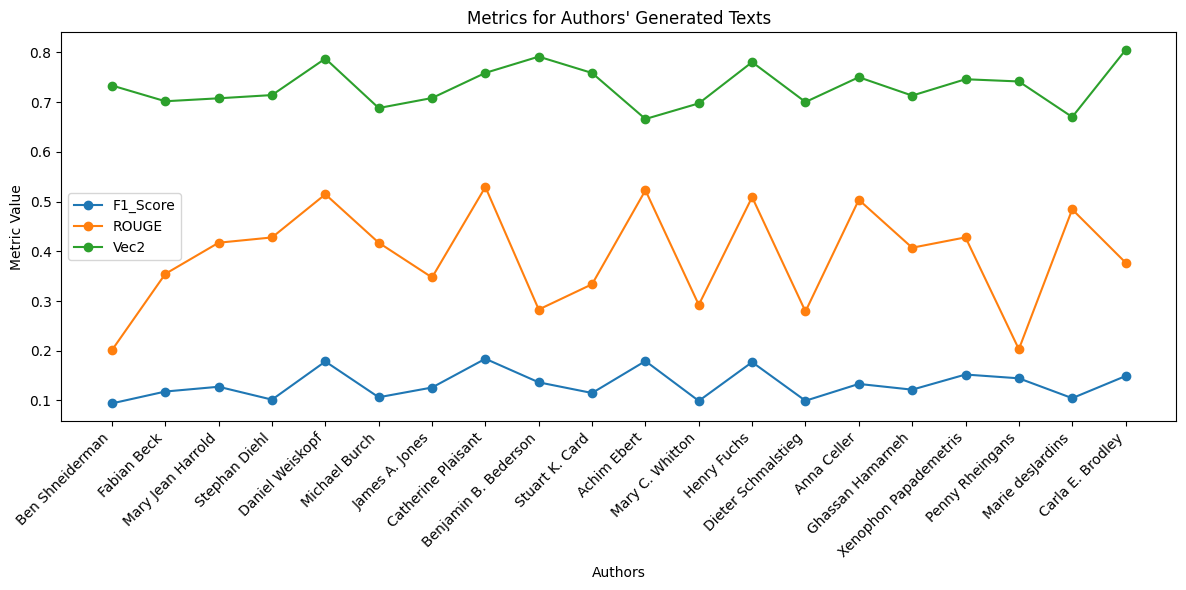

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('combined_metrics.csv')

# List of authors
authors = data['Name'].unique()

# Metrics to visualize
metrics = ['F1_Score', 'ROUGE', 'Vec2']

# Plot settings
plt.figure(figsize=(12, 6))

# Loop through each metric
for metric in metrics:
    plt.plot(authors, data.groupby('Name')[metric].mean(), marker='o', label=metric)

plt.title('Metrics for Authors\' Generated Texts')
plt.xlabel('Authors')
plt.ylabel('Metric Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('combined_metrics.csv')

# Group the data by 'Name' and calculate the mean for F1 Score, Rouge, Length, and Vec2
grouped_data = data.groupby('Name')[['F1_Score', 'ROUGE', 'Length', 'Vec2']].mean()

# Get the unique names of the authors in the same order as in the CSV file
unique_names = data['Name'].unique()

# Create a list to hold the results
results = []

# Populate the results list with author metrics
for name in unique_names:
    author_metrics = grouped_data.loc[name]
    results.append([name, author_metrics['F1_Score'], author_metrics['ROUGE'], author_metrics['Length'], author_metrics['Vec2']])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Name', 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2'])

# Save the results to a CSV file
results_df.to_csv('author_mean_metrics.csv', index=False)


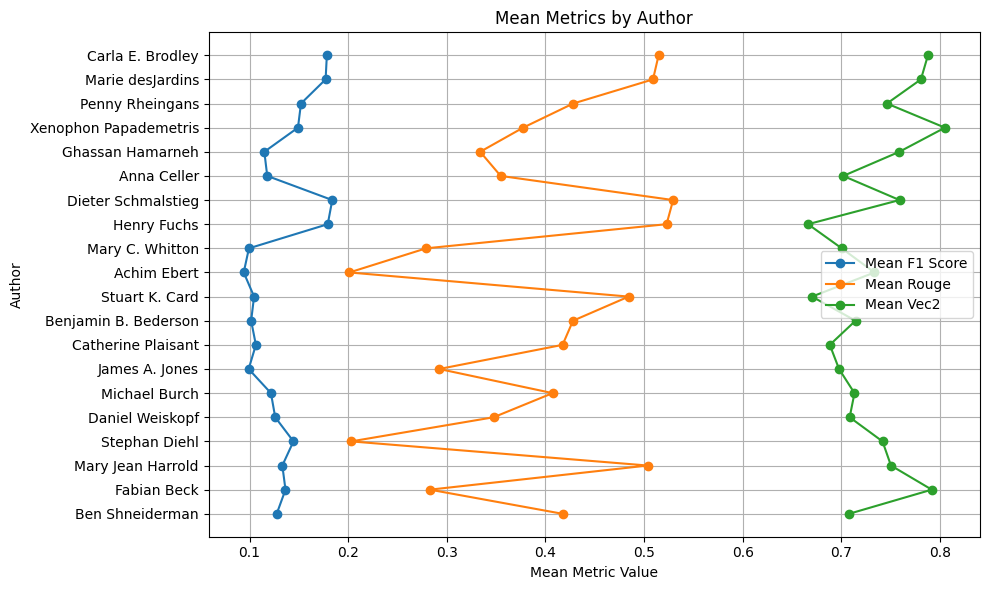

In [9]:
# Create a line plot for all metrics
plt.figure(figsize=(10, 6))
metrics = ['Mean F1 Score', 'Mean Rouge','Mean Vec2']

for metric in metrics:
    plt.plot(results_df[metric], results_df['Name'], marker='o', linestyle='-', label=metric)

plt.xlabel('Mean Metric Value')
plt.ylabel('Author')
plt.title('Mean Metrics by Author')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()